In [1]:
import ee
import geemap
from src.constants import DATA_PATH, USER_PATH
import seaborn as sns
from fastai.tabular.all import save_pickle, load_pickle
import matplotlib.pyplot as plt
palette = sns.color_palette("Set2")
from src.data import gedi_pipeline

sns.set_theme()

### Inspect unburned areas

In [10]:
gedi_unburned = load_pickle(f"{DATA_PATH}/gedi_intermediate/filtered_unburned_shots.pkl")

In [71]:
gedi_burned, _ = gedi_pipeline.load_stage_11()

<AxesSubplot: ylabel='agbd'>

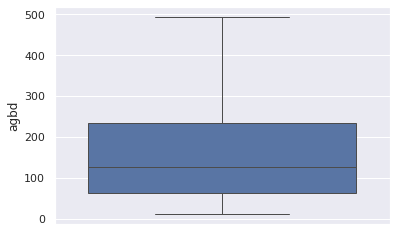

In [73]:
sns.boxplot(gedi_burned[(gedi_burned.gridded_pft_class==1) & (gedi_burned.dw_land_cover_median==1) & (gedi_burned.severity == 2)], y="agbd", showfliers=False)

In [103]:
df = gedi_burned[(gedi_burned.gridded_pft_class==1) & (gedi_burned.dw_land_cover_median==1) & (gedi_burned.severity == 4)].sample()
print(f"{float(df.latitude)}, {float(df.longitude)}")
df[["elevation_difference_tdx", "slope_median", "elevation_median", "rh_70", "pai", "NDVI_mean", "agbd", "time_since_burn", "burn_year"]]

39.20830095106548, -120.58595826256197


,elevation_difference_tdx,slope_median,elevation_median,rh_70,pai,NDVI_mean,agbd,time_since_burn,burn_year
15897553,-11.996887,27.792789,1027.0,10.36,2.711304,0.64056,119.777939,14.0,2008.0


<AxesSubplot: ylabel='agbd'>

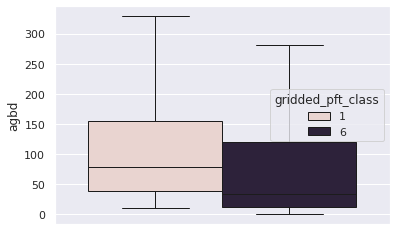

In [104]:
sns.boxplot(gedi_burned[(gedi_burned.dw_land_cover_median==1) & (gedi_burned.gridded_pft_class.isin([1, 6]))], y="agbd", hue="gridded_pft_class", showfliers=False)

In [116]:
df = gedi_burned[(gedi_burned.gridded_pft_class==6) & (gedi_burned.dw_land_cover_median==1) & (gedi_burned.severity == 2)].sample()
print(f"{float(df.latitude)}, {float(df.longitude)}")
df[["elevation_difference_tdx", "slope_median", "elevation_median", "rh_70", "pai", "NDVI_mean", "agbd", "time_since_burn", "burn_year"]]

39.54910690788614, -120.22265905308102


,elevation_difference_tdx,slope_median,elevation_median,rh_70,pai,NDVI_mean,agbd,time_since_burn,burn_year
10145287,-1.767212,14.429876,2040.5,1.64,0.226216,0.491538,11.500147,26.0,1994.0


In [ ]:
gedi_burned[((gedi_burned.gridded_pft_class==6) & (gedi_burned.dw_land_cover_median==1)) | (gedi_burned.gridded_pft_class==1) & (gedi_burned.dw_land_cover_median==5)]

In [135]:
df = gedi_burned[(gedi_burned.gridded_pft_class==1) & (gedi_burned.dw_land_cover_median==5) & (gedi_burned.severity == 2) & (gedi_burned.agbd > 100)].sample()
print(f"{float(df.latitude)}, {float(df.longitude)}")
df[["elevation_difference_tdx", "slope_median", "elevation_median", "rh_70", "pai", "NDVI_mean", "agbd", "time_since_burn", "burn_year"]]

39.01786800073161, -120.70617770880823


,elevation_difference_tdx,slope_median,elevation_median,rh_70,pai,NDVI_mean,agbd,time_since_burn,burn_year
8131374,3.471741,34.634613,638.0,15.02,3.432132,0.57505,159.989182,15.0,2006.0


# High Severity Analysis

In [214]:
gedi_df = gedi_burned[gedi_burned.severity == 4]

# 1 year after fire
gedi_df = gedi_df[gedi_df.time_since_burn == 34]

(0.0, 500.0)

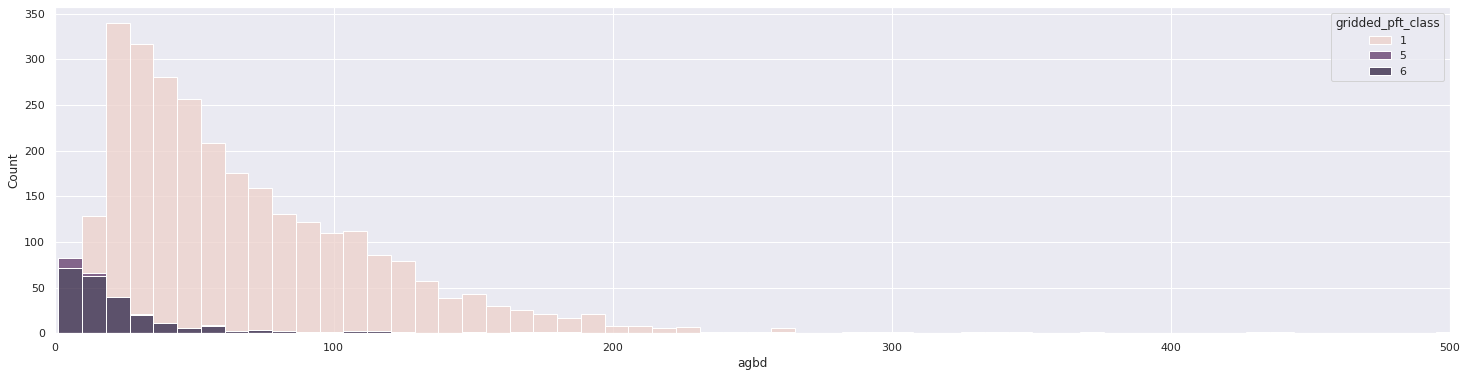

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_df, x = "agbd", hue="gridded_pft_class", multiple="stack")
ax.set_xlim((0, 500))


(0.0, 500.0)

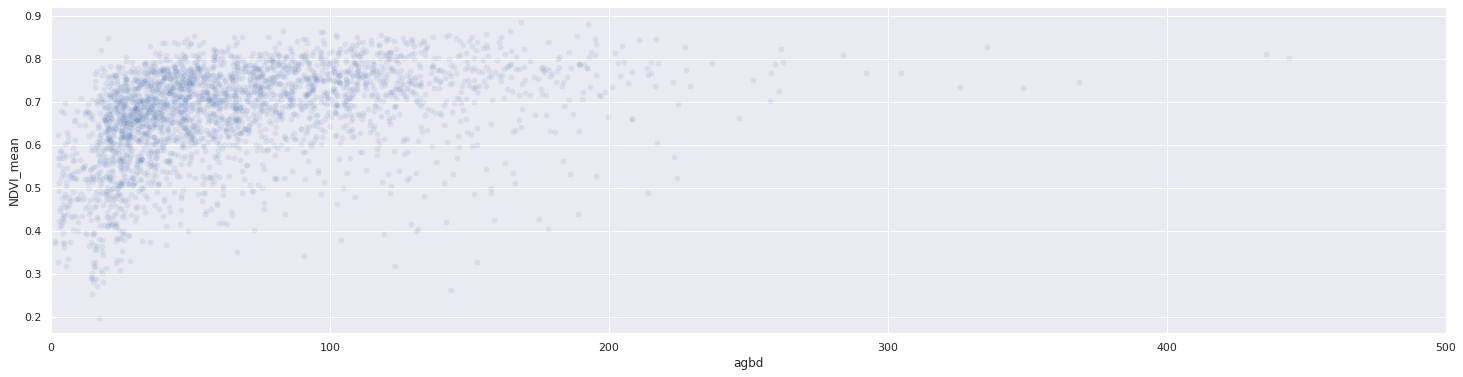

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.scatterplot(gedi_df, x = "agbd", y="NDVI_mean", alpha=0.1)
ax.set_xlim((0, 500))

In [218]:
gedi_df[["NDVI_mean", "agbd"]].corr()

,NDVI_mean,agbd
NDVI_mean,1.000000,0.385436
agbd,0.385436,1.000000


In [147]:
gedi_df = gedi_burned[gedi_burned.severity == 4]

# 1 year after fire
gedi_df = gedi_df[gedi_df.time_since_burn == 1]

(0.0, 500.0)

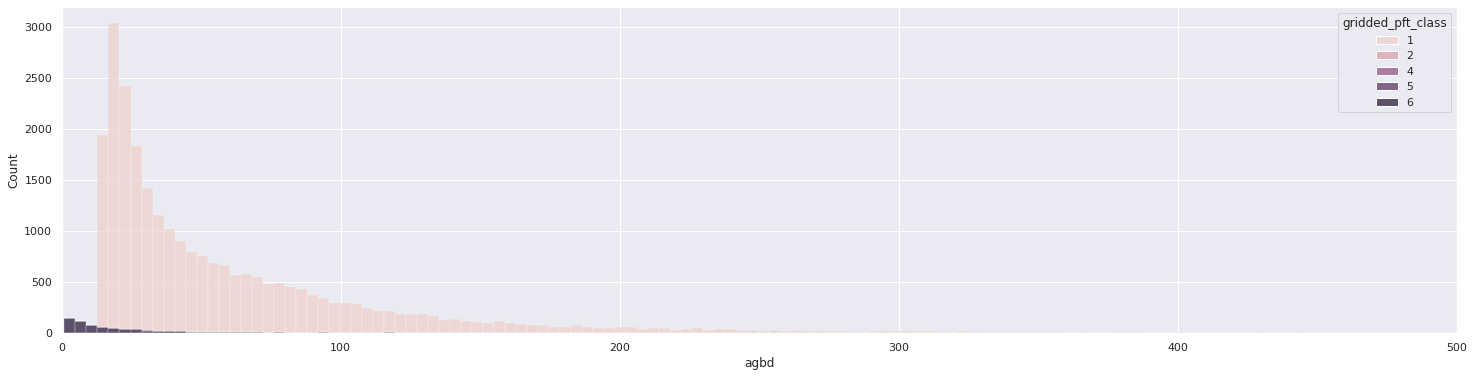

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.histplot(gedi_df, x = "agbd", hue="gridded_pft_class", multiple="stack")
ax.set_xlim((0, 500))


In [180]:
gedi_df = gedi_df[gedi_df.gridded_pft_class == 1]

(0.0, 500.0)

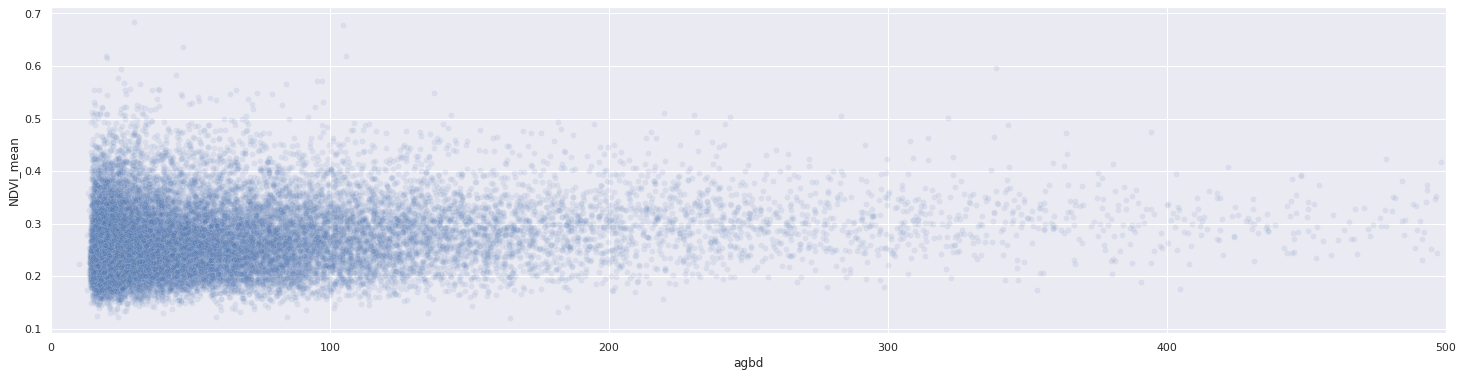

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.scatterplot(gedi_df, x = "agbd", y="NDVI_mean", alpha=0.1)
ax.set_xlim((0, 500))

(0.0, 500.0)

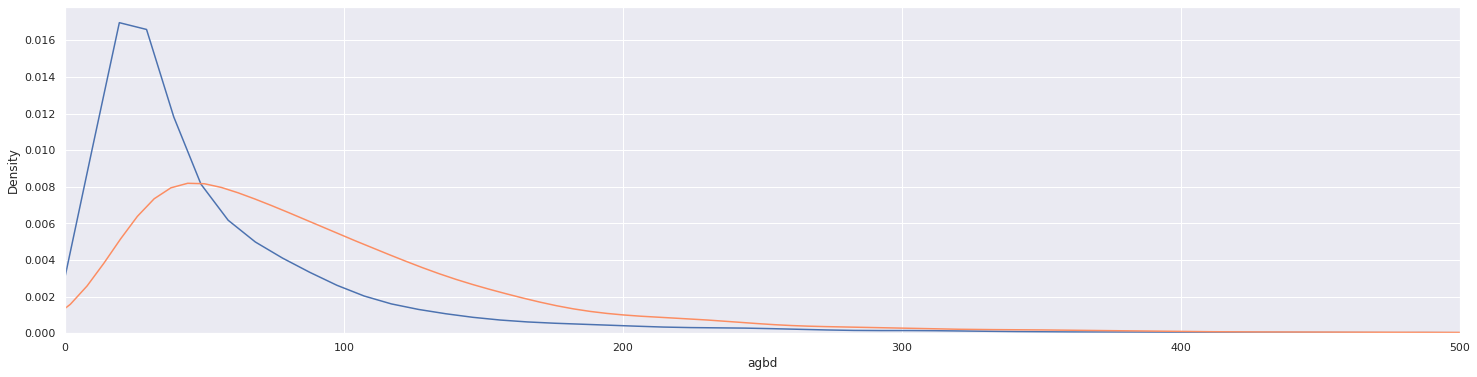

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
sns.kdeplot(gedi_df[gedi_df.slope_median < 25], x="agbd")
sns.kdeplot(gedi_df[gedi_df.slope_median > 25], x="agbd", color = palette[1])
ax.set_xlim((0, 500))

In [233]:
df = gedi_df[(gedi_df.agbd < 50) & (gedi_df.NDVI_mean > 0.7)].sample()
print(f"{float(df.latitude)}, {float(df.longitude)}")
df[["elevation_difference_tdx", "slope_median", "elevation_median", "rh_70", "pai", "NDVI_mean", "agbd", "time_since_burn", "burn_year", "gridded_pft_class", "dw_land_cover_median"]]

39.32069737885171, -121.13763106745478


,elevation_difference_tdx,slope_median,elevation_median,rh_70,pai,NDVI_mean,agbd,time_since_burn,burn_year,gridded_pft_class,dw_land_cover_median
10753925,-0.446045,9.233237,602.0,1.31,0.080685,0.730563,21.581053,34.0,1988.0,1,1.0
